In [7]:
import sys
sys.path.append("/home/isabrah/sustainable_high_quality_wikis")
import article_assessment
import pandas as pd
import numpy as np
from os.path import join as opj
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import glob
import multiprocessing as mp
import pickle

### Configurations and functions

In [3]:
def extract_promotion_demotion_dates(idx, usecase, path_to_file):
    cur_article_assessment_obj = pickle.load(open(path_to_file, "rb"))
    article_id = cur_article_assessment_obj.article_id
    is_sustainable = cur_article_assessment_obj.is_sustainable
    birth_to_promotion_days = cur_article_assessment_obj.birth_to_fa_promotion if usecase == 'fa' else cur_article_assessment_obj.birth_to_ga_promotion
    promotion_to_demotion_days = cur_article_assessment_obj.fa_promotion_to_demotion if usecase == 'fa' else cur_article_assessment_obj.ga_promotion_to_demotion
    promoted_to_ga_then_fa = cur_article_assessment_obj.promoted_to_ga_then_fa
    dict_to_return = {'article_id': article_id, 'is_sustainable': is_sustainable, 
                      'birth_to_promotion_days': birth_to_promotion_days, 
                      'promotion_to_demotion_days': promotion_to_demotion_days,
                      'promoted_to_ga_then_fa': promoted_to_ga_then_fa}
    return dict_to_return

In [13]:
n_cpus = 100
usecase = 'ga' # 'fa' # 'ga'
data_folder = '/shared/3/projects/relationship-aware-networks-wikipedia/wiki_generated_data/'
output_folder = '/shared/3/projects/relationship-aware-networks-wikipedia/models'
metadata_files_folder = opj(data_folder, 'meta_data')
pickle_files_folder = opj(data_folder, 'article_assessment_objs', 'good_articles') \
    if usecase == 'ga' else opj(data_folder, 'article_assessment_objs', 'featured_articles')
# in both cases of good/featured, we have to add the 'both' folder
pickle_files_folder = [pickle_files_folder, opj(data_folder, 'article_assessment_objs', 'both')]
pickle_files_path = sorted(list(itertools.chain(*[glob.glob(opj(pff, '*.p')) for pff in pickle_files_folder])))
print(f"We have found {len(pickle_files_path)} file to process.")

We have found 42536 file to process.


In [14]:
input_for_pool = [(idx, usecase, fp) for idx, fp in enumerate(pickle_files_path)]
pool = mp.Pool(processes=n_cpus)
with pool as pool:
    results = pool.starmap(extract_promotion_demotion_dates, input_for_pool)
dates_df = pd.DataFrame.from_dict(results)

### Promotion/Demotion Analysis

In [15]:
dates_df.head(50)

,article_id,is_sustainable,birth_to_promotion_days,promotion_to_demotion_days,promoted_to_ga_then_fa
0,100061,False,1434,282.0,False
1,100062,False,1528,NaN,False
2,10007056,True,464,NaN,True
3,10029898,True,706,NaN,True
4,100320,True,3179,NaN,True
5,10035910,True,12,NaN,True
6,10044841,True,2875,NaN,True
7,1006150,True,2214,NaN,True
8,10067647,True,1051,NaN,True
9,1006812,True,5075,NaN,True


In [16]:
# number of cases from each scenario
promotion_cases = dates_df[~dates_df['birth_to_promotion_days'].isna()]
demotion_cases = dates_df[~dates_df['promotion_to_demotion_days'].isna()]
print(f"There are {promotion_cases.shape[0]} of promotions and {demotion_cases.shape[0]} of demotions.")

There are 42536 of promotions and 3438 of demotions.


### Analysis of the time between creation, promotion and demotion - FA Articles

The average :: median number of days from birth to promotion is 2010.62 :: 1517.0


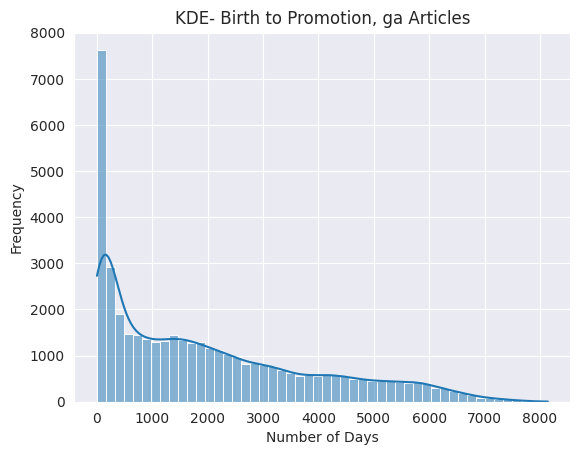

In [17]:
avg_birth_to_promotion = np.round(np.nanmean(promotion_cases['birth_to_promotion_days']), 2)
median_birth_to_promotion = np.round(np.nanmedian(promotion_cases['birth_to_promotion_days']), 2)
print(f"The average :: median number of days from birth to promotion is {avg_birth_to_promotion} :: {median_birth_to_promotion}")
#sns.kdeplot(promotion_cases['birth_to_promotion_days'], fill=True)#, bw_method=3)
sns.histplot(data=promotion_cases, x="birth_to_promotion_days", kde=True)
plt.xlabel('Number of Days')
plt.ylabel('Frequency')
plt.title(f'KDE- Birth to Promotion, {usecase} Articles')
plt.show()

The average :: median number of days from promotion to demotion is 2443.22 :: 1773.5


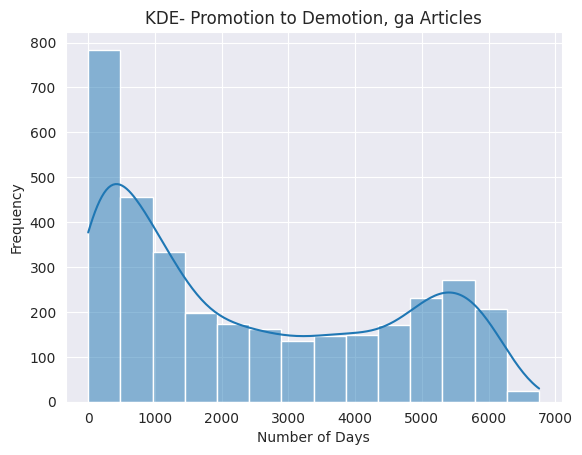

In [18]:
avg_promotion_to_demotion = np.round(np.nanmean(demotion_cases['promotion_to_demotion_days']), 2)
median_promotion_to_demotion = np.round(np.nanmedian(demotion_cases['promotion_to_demotion_days']), 2)
print(f"The average :: median number of days from promotion to demotion is {avg_promotion_to_demotion} :: {median_promotion_to_demotion}")

#sns.kdeplot(demotion_cases['promotion_to_demotion_days'], fill=True)#, bw_method=4)
sns.histplot(data=promotion_cases, x="promotion_to_demotion_days", kde=True)
plt.xlabel('Number of Days')
plt.ylabel('Frequency')
plt.title(f'KDE- Promotion to Demotion, {usecase} Articles')
plt.show()